In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.utils import shuffle

/home/fsftn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
auc2011 = pd.read_csv('2011_auctions.csv') 
role = pd.read_csv('player_role2011.csv') 

In [4]:
auc2011[:5]

,team_name,player_name,ipl_team,buy_price,base_price
0,India,Gautam Gambhir,Kolkata Knight Riders,"$2,400,000","$200,000"
1,India,Yusuf Pathan,Kolkata Knight Riders,"$2,100,000","$300,000"
2,India,Robin Uthappa,Pune Warriors India,"$2,100,000","$200,000"
3,India,Rohit Sharma,Mumbai Indians,"$2,000,000","$200,000"
4,India,Irfan Pathan,Delhi Daredevils,"$1,900,000","$200,000"


In [5]:
balls = []
runs = []
avg = []
srate = []
batsman = []
base_price  = []
buy_price  = []
for index, row in auc2011.iterrows():
    
    
    
    
    
    pname = str(row['player_name'].replace(' ','+'))
    #print pname
    prole = role[role['pname'].str.find(pname) != -1] 
    if(len(prole) == 0):
        continue
    prole = prole.iloc[0]['role']
 
    fname = 'score_files/2011_t20_' + pname + '.csv'
    #print fname
    if(prole == 0):
        continue
        
    if (os.path.isfile(fname)):
        data = pd.read_csv(fname)
        
        data['balls']  =  data['balls'].astype('str') 
        data = data[data['balls'] != '\xc2\xa0']
        
        data['balls']  =  data['balls'].astype('float') 
        data['runs']  =  data['runs'].astype('float') 
        
        #data = data[data['runs'] != '\xc2\xa0']
        if(len(data) < 2):
            continue
            
        bprice  = str(row['base_price'].replace(',',''))
        bprice  = bprice.replace('$','')
        bprice = float(bprice)
        
        b2price  = str(row['buy_price'].replace(',',''))
        b2price  = b2price.replace('$','')
        b2price = float(b2price)
    
        batsman.append(pname)
        base_price.append(bprice) 
        buy_price.append(b2price)

        balls.append(np.sum(data['balls']))
        runs.append(np.sum(data['runs']))
        avg.append(np.sum(data['runs'])/(len(data)))
        srate.append(np.mean([(r/b)*100 for r,b in zip(data['runs'], data['balls'])]))
        
        
        
    else:
        print 'file no exists'
        print fname
        #continue

In [6]:
import math
s2011 = pd.DataFrame()
s2011['batsman'] = batsman
s2011['base_price'] = base_price
s2011['buy_price'] = buy_price
s2011['runs'] = runs
s2011['balls'] = balls
s2011['avg'] = avg
s2011['srate'] = srate
pruns  = np.array(s2011['runs'])
pavg  = np.array(s2011['avg'])
psrate  = np.array(s2011['srate'])
pbase_price  = np.array(s2011['base_price'])
 

s2011['runs2'] = np.array([i*i for i in pruns])
s2011['avg2'] = np.array([i*i for i in pavg])
s2011['srate2'] = np.array([i*i for i in psrate])
s2011['base_price2'] = np.array([i*i for i in pbase_price])
s2011['runs3'] = np.array([math.sqrt(i) for i in pruns])
s2011['runs4'] = np.array([i*i*i for i in pruns])

In [7]:
s2011.to_csv('s2011_data.csv')

In [8]:
#print (s2011.corr(method='pearson', min_periods=1))
s2011 = shuffle(s2011)
#s2011[:5]
s2011.corr(method='pearson', min_periods=1)

,base_price,buy_price,runs,balls,avg,srate,runs2,avg2,srate2,base_price2,runs3,runs4
base_price,1.000000,0.425668,0.393551,0.396337,0.405585,0.144420,0.270142,0.350516,0.100256,0.969062,0.461713,0.195724
buy_price,0.425668,1.000000,0.302374,0.289716,0.180944,0.193833,0.237879,0.126286,0.177673,0.342924,0.336009,0.206794
runs,0.393551,0.302374,1.000000,0.991242,0.650410,0.327367,0.939148,0.573031,0.264684,0.326566,0.966187,0.844252
balls,0.396337,0.289716,0.991242,1.000000,0.651110,0.274175,0.922954,0.570433,0.210382,0.328760,0.964289,0.824891
avg,0.405585,0.180944,0.650410,0.651110,1.000000,0.334851,0.482210,0.962394,0.282911,0.339050,0.740425,0.369707
srate,0.144420,0.193833,0.327367,0.274175,0.334851,1.000000,0.260897,0.326596,0.986548,0.117874,0.357930,0.213954
runs2,0.270142,0.237879,0.939148,0.922954,0.482210,0.260897,1.000000,0.439399,0.211665,0.214414,0.828673,0.973546
avg2,0.350516,0.126286,0.573031,0.570433,0.962394,0.326596,0.439399,1.000000,0.285040,0.298997,0.632552,0.341118
srate2,0.100256,0.177673,0.264684,0.210382,0.282911,0.986548,0.211665,0.285040,1.000000,0.081537,0.292350,0.175760
base_price2,0.969062,0.342924,0.326566,0.328760,0.339050,0.117874,0.214414,0.298997,0.081537,1.000000,0.385739,0.143769


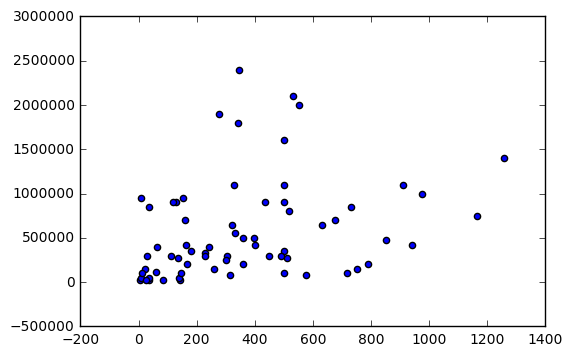

In [9]:
plt.scatter(s2011['runs'],s2011['buy_price'])

In [10]:
import sklearn
from sklearn import linear_model
s2011.dropna(inplace = True)
len_data = len(s2011)
train_set = s2011[:int(len_data*0.8)]
len(train_set)
test_set = s2011[len(train_set):]
print (len(test_set['buy_price']))

13


In [11]:
regr = linear_model.LinearRegression()

In [12]:
def linearRegModel(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
     
    mse = metrics.mean_squared_error(predictions, data[outcome]) 
    print 'mse',mse
     
    
   
 
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
   

In [13]:
from sklearn.linear_model import Ridge

train_set = s2011[:int(len_data*0.8)]
len(train_set)
test_set = s2011[len(train_set):]

outcome_var = 'runs'
model = LinearRegression()
predictor_var = ['avg','srate']
linearRegModel(model, s2011, predictor_var,outcome_var)
m = model.coef_
print("coefficients are")
print(m)

mse 50717.4003187
coefficients are
[ 20.32354382   1.88849804]


In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
   

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.tree import DecisionTreeRegressor

train_set = s2011[:int(len_data*0.8)]
len(train_set)
test_set = s2011[len(train_set):]


model = DecisionTreeRegressor(criterion='mse',max_depth=5, min_samples_split=2, min_samples_leaf= 2)
ans =  'buy_price'
cols = ['runs4','avg2','base_price']
a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

13
216.518682424


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
  
model = RandomForestRegressor()

ans =  'buy_price'
cols = ['runs4','avg2','base_price']
a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

13
264.837606838


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
 
 
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)






ans =  'buy_price'
cols = ['runs2','avg2','base_price']
a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

13
275.198401188


/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


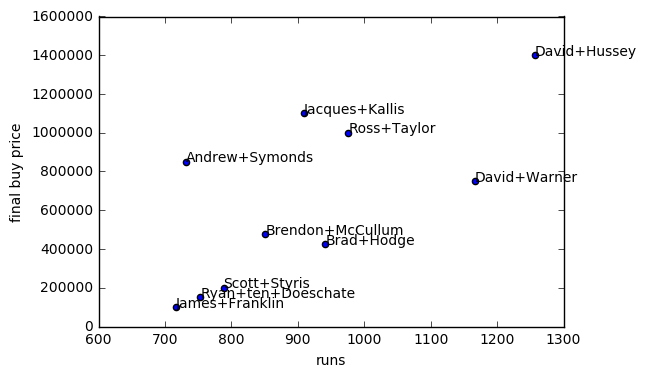

In [17]:
s2011_sorted = s2011.sort(['runs'])
s2011_s = s2011_sorted[-10:]
x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('runs')
    ax.set_ylabel('final buy price')
#plt.x_label('runs')
#plt.set_xlabel('xlabel')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


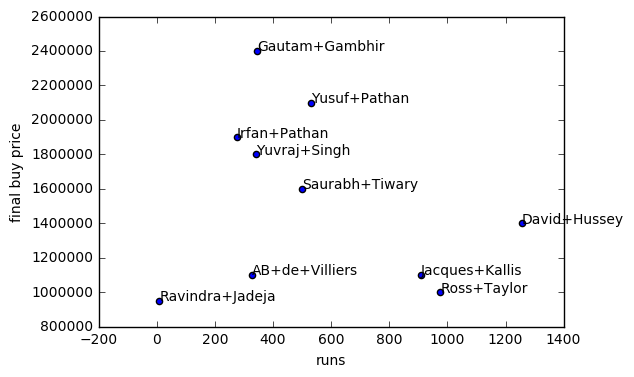

In [18]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('runs')
    ax.set_ylabel('final buy price')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


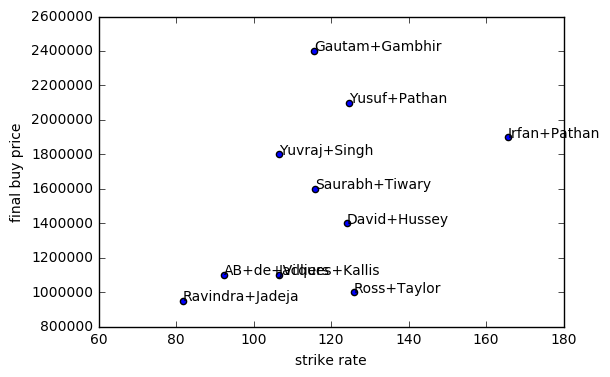

In [19]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['srate'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
    ax.set_xlabel('strike rate')
    ax.set_ylabel('final buy price')

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


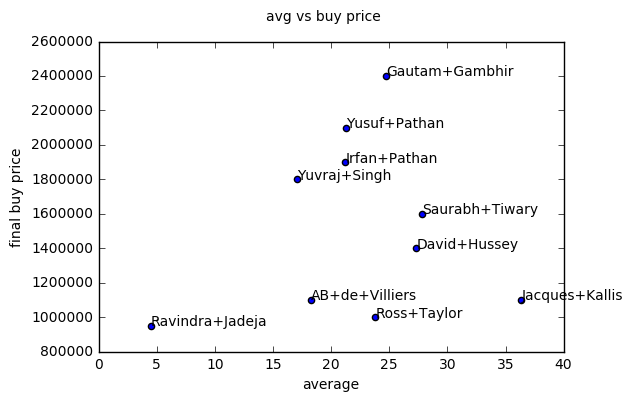

In [20]:
s2011_sorted = s2011.sort(['buy_price'])
s2011_s = s2011_sorted[-10:]
#print s2011_s
x =  np.array(s2011_s['avg'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
fig.suptitle('avg vs buy price')
plt.xlabel('average')
plt.ylabel('final buy price')
 

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


3
43.5615079365


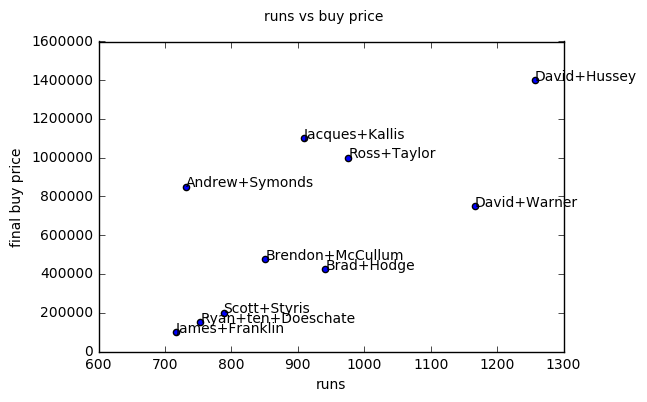

In [21]:
#remove players scoring least runs

s2011_sorted = s2011.sort(['runs'])
#s2011_sorted[:10] 
s2011_sorted = s2011_sorted[10:] 
s2011_s = s2011_sorted[-10:]
len(s2011_sorted)
x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
fig.suptitle('runs vs buy price')
plt.xlabel('runs')
plt.ylabel('final buy price')



from sklearn.tree import DecisionTreeRegressor

train_set = s2011_sorted[:int(len_data*0.8)]
len(train_set)
test_set = s2011_sorted[len(train_set):]


model = DecisionTreeRegressor(criterion='mse',max_depth=5, min_samples_split=2, min_samples_leaf= 2)
ans =  'buy_price'
cols = ['runs4','avg2','base_price']
a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))

In [1]:
s2011_sorted = s2011.sort(['runs'])
#s2011_sorted[:10] 
s2011_sorted = s2011_sorted[10:] 
s2011_s = s2011_sorted[-20:]
len(s2011_sorted)



x =  np.array(s2011_s['runs'])
y =  np.array(s2011_s['buy_price'])

names= np.array(s2011_s['batsman'])

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(names):
    ax.annotate(txt, (x[i],y[i]))
fig.suptitle('runs vs buy price')
plt.xlabel('runs')
plt.ylabel('final buy price')

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor

 
model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),   n_estimators=360)
#model =  GradientBoostingRegressor()

len_data = len(s2011_sorted)
print 'total is ',len_data
train_set = s2011_sorted[:int(len_data*0.9)]
print 'trains et ',len(train_set)
test_set = s2011_sorted[len(train_set):]


ans =  'buy_price'
 

cols = ['runs', 'base_price']
#cols = ['runs','base_price']


a = train_set[cols]
model.fit(a,train_set[ans])
test_feat = test_set[cols]

vals = np.array(model.predict(test_feat))
preds = model.predict(test_set[cols])
print len(vals)
print mean_absolute_percentage_error(np.array(test_set[ans]), np.array(preds))


NameError: name 's2011' is not defined